## Pytorch Neurer Network
---

In [18]:
import os
import torch
from torch import nn                          # 신경망 모듈
from torch.utils.data import DataLoader       # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms  # torch저장소 데이터 셋 모듈
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## [1] 데이터 준비
---


In [8]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### NN 모델 생성 
---

In [9]:
# 순차적인 Layer 구성 => Sequential, Layer...
class NeuralNetwork(nn.Module):
    # 생성자 메서드, NeuralNework() 객체 생성시 실행
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # 입력층(input_dim, output_dim)
            nn.Linear(28*28, 512),
            nn.ReLU(),
            # 은닉층(input_dim, output_dim)
            nn.Linear(512, 512),
            # 출력층(input_dim, output_dim)
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    # NN 모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원으로 데이터 변환
        x = self.flatten(x)
        # NN모델에 입력 데이터 전달
        logits = self.linear_relu_stack(x)
        return logits


In [12]:
#NN 모델 생성
mnistM=NeuralNetwork().to(device)

In [11]:
mnistM.flatten

Flatten(start_dim=1, end_dim=-1)

In [13]:
# 데이터 준비
X = torch.rand(1,28,28, device=device)
print(X)

tensor([[[0.5344, 0.2237, 0.8968, 0.0086, 0.2726, 0.1418, 0.0749, 0.6630,
          0.9124, 0.3643, 0.4567, 0.8498, 0.7650, 0.9463, 0.5059, 0.5949,
          0.3006, 0.9885, 0.9507, 0.8955, 0.1612, 0.8779, 0.1481, 0.6118,
          0.7150, 0.1849, 0.5540, 0.8803],
         [0.8806, 0.1303, 0.7536, 0.3470, 0.9452, 0.8105, 0.5873, 0.5749,
          0.4113, 0.8856, 0.6274, 0.8473, 0.4504, 0.9740, 0.8589, 0.8444,
          0.5950, 0.6636, 0.3913, 0.6330, 0.0015, 0.8831, 0.2520, 0.4022,
          0.8278, 0.2378, 0.5743, 0.9878],
         [0.3384, 0.1596, 0.7746, 0.9200, 0.0056, 0.9576, 0.6553, 0.8311,
          0.9448, 0.2429, 0.1285, 0.5490, 0.6802, 0.9221, 0.4304, 0.6475,
          0.3140, 0.0585, 0.1207, 0.3185, 0.3308, 0.6223, 0.8983, 0.3542,
          0.1728, 0.8697, 0.3195, 0.9292],
         [0.5320, 0.2545, 0.5961, 0.1236, 0.2363, 0.1631, 0.9661, 0.1656,
          0.0968, 0.2855, 0.1560, 0.4524, 0.8542, 0.3710, 0.4084, 0.7746,
          0.1610, 0.7833, 0.1322, 0.4916, 0.1140, 0.2250,

In [14]:
# 학습
logits = mnistM(X)

In [16]:
print(f'학습 결과 : {logits},{logits.shape}')

학습 결과 : tensor([[ 0.0280,  0.0056,  0.0261,  0.1101, -0.0506,  0.0952,  0.0466,  0.0426,
          0.0858,  0.0674]], grad_fn=<AddmmBackward0>),torch.Size([1, 10])


In [17]:
# 결과 분석
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(y_pred)

tensor([[0.0982, 0.0960, 0.0980, 0.1065, 0.0907, 0.1050, 0.1000, 0.0996, 0.1040,
         0.1021]], grad_fn=<SoftmaxBackward0>)
tensor([3])


In [19]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



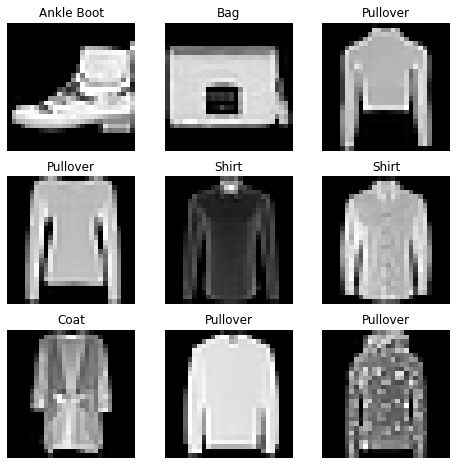

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()